
# Rede Neural com Backpropagation
Este notebook contém um exemplo de uma rede neural simples, que é treinada usando o algoritmo backpropagation.
As funções de visualização são fornecidas em células separadas para facilitar a navegação e compreensão.


In [1]:

# Redes Neurais Artificiais - Backpropagation

import numpy as np

# Funções de ativação e suas derivadas
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Inicializações
inputs = np.array([0.5, 0.9, -0.3])
expected_output = np.array([0.9, 0.3])
weights_hidden = np.array([[1.0, -2.0, 2.0], [2.0, 1.0, -4.0], [1.0, -1.0, 0.0]])
weights_output = np.array([[-3.0, 1.0, -3.0], [0.0, 1.0, 2.0]])
learning_rate = 0.1
loss_values = []

# Número ajustável de épocas
num_epochs = 1000  # Altere este número conforme desejado

# Treinamento da rede neural
for epoch in range(num_epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(weights_hidden, inputs)
    hidden_layer_output = sigmoid(hidden_layer_activation)
    final_output = sigmoid(np.dot(weights_output, hidden_layer_output))

    # Backpropagation
    error = expected_output - final_output
    d_final_output = error * sigmoid_derivative(final_output)
    error_hidden_layer = d_final_output.dot(weights_output)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    weights_output += learning_rate * np.outer(d_final_output, hidden_layer_output)
    weights_hidden += learning_rate * np.outer(d_hidden_layer, inputs)

    # Cálculo do erro
    loss = np.mean(np.square(error))
    loss_values.append(loss)

    if epoch % (num_epochs//10) == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
        
# Imprime os pesos finais após o treino:
print('\\nPesos finais da camada oculta:')
print(weights_hidden)
print('Pesos finais da camada de saída:')
print(weights_output)

print('\\Output final após o treino:')
print(final_output)
print('Output esperado:')
print(expected_output)
print('Erro final:')
print(error)

Epoch 0, Loss: 0.306532921277229
Epoch 100, Loss: 0.07976273745407689
Epoch 200, Loss: 0.022893551318966317
Epoch 300, Loss: 0.008087388399890877
Epoch 400, Loss: 0.003591469033946814
Epoch 500, Loss: 0.001903392475856794
Epoch 600, Loss: 0.0011481058318983106
Epoch 700, Loss: 0.0007586803726333501
Epoch 800, Loss: 0.0005335345464266322
Epoch 900, Loss: 0.00039120953760583783
\nPesos finais da camada oculta:
[[ 0.78535854 -2.38635463  2.12878488]
 [ 2.05894493  1.10610087 -4.03536696]
 [ 0.30605228 -2.2491059   0.41636863]]
Pesos finais da camada de saída:
[[-2.82735452  2.6021329  -2.62164075]
 [-0.21514193 -1.04321128  1.55538615]]
\Output final após o treino:
[0.87579945 0.3024596 ]
Output esperado:
[0.9 0.3]
Erro final:
[ 0.02420055 -0.0024596 ]


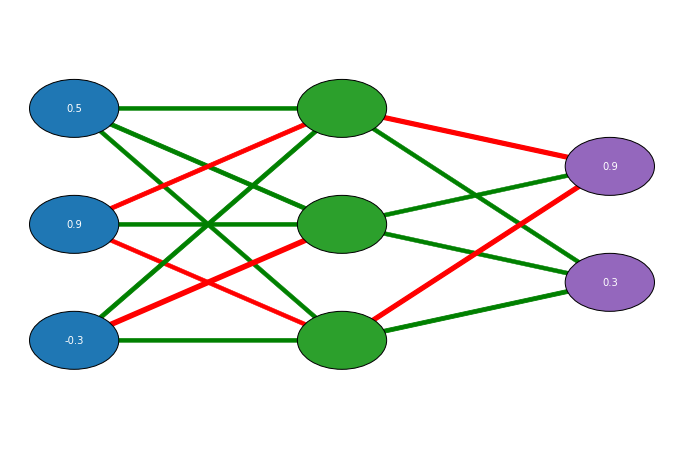

In [3]:

# [Código de visualização da rede neural e do gráfico da função "loss" ao longo das épocas]

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, weights, node_colors):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib Axes object
    :param left: x-coordinate of the left side of the drawing
    :param right: x-coordinate of the right side of the drawing
    :param bottom: y-coordinate of the bottom of the drawing
    :param top: y-coordinate of the top of the drawing
    :param layer_sizes: list of layer sizes
    :param weights: list of arrays of layer weights
    :param node_colors: list of colors for the nodes in each layer
    '''
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            color = node_colors[n]  # Color for this layer
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            # Node annotations with contrastive text color for visibility
            if color in ['#1f77b4', '#2ca02c', '#9467bd']:
                text_color = 'white'
            else:
                text_color = 'black'
            if n == 0:
                ax.text(n * h_spacing + left, layer_top - m * v_spacing, str(inputs[m]), 
                        ha='center', va='center', color=text_color, zorder=5)
            elif n == len(layer_sizes) - 1:
                ax.text(n * h_spacing + left, layer_top - m * v_spacing, 
                        str(np.round(final_output[m], 2)), ha='center', va='center', color=text_color, zorder=5)
    
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                weight_val = weights[n][o, m]
                linewidth = max(min(np.abs(weight_val) / 2.5, 5), 0.5)
                line_color = 'red' if weight_val < 0 else 'green'
                line = mpatches.FancyArrowPatch((n * h_spacing + left, layer_top_a - m * v_spacing),
                                                ((n + 1) * h_spacing + left, layer_top_b - o * v_spacing),
                                                connectionstyle='arc3,rad=0.', mutation_scale=20.0, lw=linewidth,
                                                color=line_color, zorder=1)
                ax.add_artist(line)

# Dummy values for demonstration
inputs = [0.5, 0.9, -0.3]
final_output = [0.9, 0.3] # This should be the result of the forward pass
layer_sizes = [3, 3, 2]
weights = [np.array([[1.0, -2.0, 2.0], [2.0, 1.0, -4.0], [1.0, -1.0, 0.0]]), np.array([[-3.0, 1.0, -3.0], [0.0, 1.0, 2.0]])]
node_colors = ['#1f77b4', '#2ca02c', '#9467bd']  # Colors for each layer

fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, weights, node_colors)
plt.show()
